In [1]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os
import glob
import warnings

import numpy as np

from astropy.table import Table, Column

import matplotlib.pyplot as plt

In [2]:
# Load a pickel file
import pickle

def load_pkl(fname):
    with open(fname, "rb") as f:
        return pickle.load(f)

In [3]:
#tng_data = load_pkl("/Users/shuang/Downloads/galaxies_tng300_072_hmc_haloPos.pkl")
tng_data = load_pkl("/Users/shuang/Downloads/galaxies_tng300_072_hmc_catalog_for_clustering.pkl")

In [4]:
tng_data.keys()

['catgrp_id',
 'mass_halo',
 'x',
 'y',
 'z',
 'aper_10_gal',
 'aper_30_gal',
 'aper_50_gal',
 'aper_75_gal',
 'aper_100_gal',
 'aper_150_gal',
 'c_200c',
 'c_to_a_3d',
 'b_to_a_3d',
 'v_sigma_3d',
 'acc_rate',
 'r_20_gal',
 'r_50_gal',
 'r_80_gal',
 'ellipticity',
 'PA',
 'richness_cut_r200_8.5',
 'richness_cut_r200_8.5_Q',
 'richness_cut_r800k_8.5',
 'richness_cut_r800k_8.5_Q',
 'richness_cut_r200_10',
 'richness_cut_r200_10_Q',
 'richness_cut_r800k_10',
 'richness_cut_r800k_10_Q',
 'satellite_mass_cut_r200_8.5',
 'satellite_mass_cut_r200_8.5_Q',
 'satellite_mass_cut_r800k_8.5',
 'satellite_mass_cut_r800k_8.5_Q',
 'satellite_mass_cut_r200_10',
 'satellite_mass_cut_r200_10_Q',
 'satellite_mass_cut_r800k_10',
 'satellite_mass_cut_r800k_10_Q',
 'richness_cut_r200_8.5_xy_1',
 'richness_cut_r200_8.5_xy_1_Q',
 'richness_cut_r200_8.5_xy_3',
 'richness_cut_r200_8.5_xy_3_Q',
 'richness_cut_r200_8.5_xy_5',
 'richness_cut_r200_8.5_xy_5_Q',
 'richness_cut_r200_8.5_xy_10',
 'richness_cut_r200_8.5

In [5]:
len(tng_data)

3388

In [6]:
Xg, Yg, Zg = tng_data['x'], tng_data['y'], tng_data['z']
Ng = len(Xg)

In [7]:
np.max([Xg, Yg, Zg])

216.098625

# Test Corrfunc 

In [8]:
from Corrfunc.io import read_catalog 

from Corrfunc.theory.wp import wp
from Corrfunc.theory.DD import DD
from Corrfunc.theory import DDrppi

from Corrfunc.utils import convert_3d_counts_to_cf, convert_rp_pi_counts_to_wp


In [10]:
boxsize =  302.6 / 1.4 # Mpc
nthreads = 4

rmin = 0.5
rmax = 40.0
nbins = 10 
rbins = np.logspace(np.log10(rmin), np.log10(rmax), nbins + 1)
r_avg = 0.5*(rbins[1:] + rbins[:-1])

pimax = 40.0 
mu_max = 1.0 
nmu_bins = 10

In [11]:
Nr = Ng * 10

Xr = np.random.uniform(0, boxsize, Nr)
Yr = np.random.uniform(0, boxsize, Nr)
Zr = np.random.uniform(0, boxsize, Nr)

In [12]:
autocorr = 1
DD_counts = DDrppi(autocorr, nthreads, pimax, rbins, Xg, Yg, Zg, 
                   boxsize=boxsize, periodic=True, verbose=True)

Running with points in [xmin,xmax] = 0.012059,216.075453 with periodic wrapping = 216.142857
Running with points in [ymin,ymax] = 0.035894,216.098625 with periodic wrapping = 216.142857
Running with points in [zmin,zmax] = 0.162706,215.897344 with periodic wrapping = 216.142857
In gridlink_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.000 sec
countpairs_rp_pi_double> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 6.78. Boosting bin refine factor - should lead to better performance
xmin = 0.012059 xmax=216.075453 rpmax = 40.000000
In gridlink_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 16,16,5.  Time taken =   0.000 sec
Using fallback kernel
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.014 secs


In [13]:
autocorr = 0
DR_counts = DDrppi(autocorr, nthreads, pimax, rbins, Xg, Yg, Zg, 
                   X2=Xr, Y2=Yr, Z2=Zr, boxsize=boxsize, periodic=True, verbose=True)

ND1 =         3388 [xmin,ymin,zmin] = [0.012059,0.035894,0.162706], [xmax,ymax,zmax] = [216.075453,216.098625,215.897344]
ND2 =        33880 [xmin,ymin,zmin] = [0.001211,0.000499,0.000794], [xmax,ymax,zmax] = [216.129938,216.140135,216.137421]
Running with points in [xmin,xmax] = 0.001211,216.129938 with periodic wrapping = 216.142857
Running with points in [ymin,ymax] = 0.000499,216.140135 with periodic wrapping = 216.142857
Running with points in [zmin,zmax] = 0.000794,216.137421 with periodic wrapping = 216.142857
In gridlink_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.000 sec
countpairs_rp_pi_double> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 6.78. Boosting bin refine factor - should lead to better performance
xmin = 0.001211 xmax=216.129938 rpmax = 40.000000
In gridlink_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 16,16,5.  Time taken =   0.000 sec
In gridlink_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 16,16,5.  Tim

0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.081 secs


In [14]:
autocorr = 1
RR_counts = DDrppi(autocorr, nthreads, pimax, rbins, Xr, Yr, Zr, 
                   boxsize=boxsize, periodic=True, verbose=True)

Running with points in [xmin,xmax] = 0.001211,216.129938 with periodic wrapping = 216.142857
Running with points in [ymin,ymax] = 0.000499,216.140135 with periodic wrapping = 216.142857
Running with points in [zmin,zmax] = 0.000794,216.137421 with periodic wrapping = 216.142857
In gridlink_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.001 sec
countpairs_rp_pi_double> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 67.8. Boosting bin refine factor - should lead to better performance
xmin = 0.001211 xmax=216.129938 rpmax = 40.000000
In gridlink_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 16,16,5.  Time taken =   0.001 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.256 secs


In [15]:
wp_with_rand = convert_rp_pi_counts_to_wp(
    Ng, Ng, Nr, Nr, DD_counts, DR_counts, DR_counts, RR_counts, nbins, pimax)

In [16]:
# Direct computation: https://corrfunc.readthedocs.io/en/master/modules/computing_wp_and_xi.html
# Note on the Nature estimator: https://corrfunc.readthedocs.io/en/master/modules/rr_autocorrelations.html#rr-autocorrelations

wp_counts = wp(boxsize, pimax, nthreads, rbins, Xg, Yg, Zg)

In [26]:
import numpy as np
# Bootstrap resampling of Xg, Yg, and Zg
# Assuming Xg, Yg, Zg are numpy arrays
wp_counts_resampled = []

num_resamples = 1000
num_data_points = len(Xg)

for _ in range(num_resamples):
    # Generate random indices with replacement
    indices = np.random.choice(num_data_points, size=num_data_points, replace=True)

    # Resample the data using the random indices
    wp_counts_resampled.append(wp(boxsize, pimax, nthreads, rbins, Xg[indices], Yg[indices], Zg[indices]))


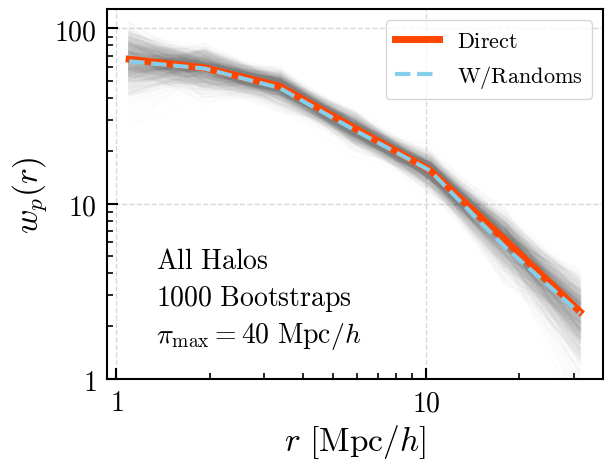

In [17]:
for wp_boot in wp_counts_resampled:
    plt.loglog(r_avg, wp_boot['wp'], alpha=0.01, color='gray')
plt.loglog(r_avg, wp_counts['wp'], linewidth=5, color='orangered', label=r"$\rm Direct$")
plt.loglog(r_avg, wp_with_rand, linestyle='--', linewidth=3, color='skyblue', label=r"$\rm W/Randoms$")
plt.legend(fontsize=16)
plt.xlabel(r"$r$ $[{\rm Mpc}/h]$", fontsize=24)
plt.ylabel(r"$w_p(r)$", fontsize=24)

plt.ylim(1, 129)
plt.text(0.1, 0.30, r"$\rm All\ Halos$", transform=plt.gca().transAxes, fontsize=20)
plt.text(0.1, 0.20, r"$1000\ \rm Bootstraps$", transform=plt.gca().transAxes, fontsize=20)
plt.text(0.1, 0.10, r"$\pi_{\rm max} = 40\ {\rm Mpc}/h$", transform=plt.gca().transAxes, fontsize=20)

# change the y-axis tick label to latex font
plt.xticks([1, 10], [r"$1$", r"$10$"], fontsize=20)
plt.yticks([1, 10, 100], [r"$1$", r"$10$", r"$100$"], fontsize=20)


plt.show()

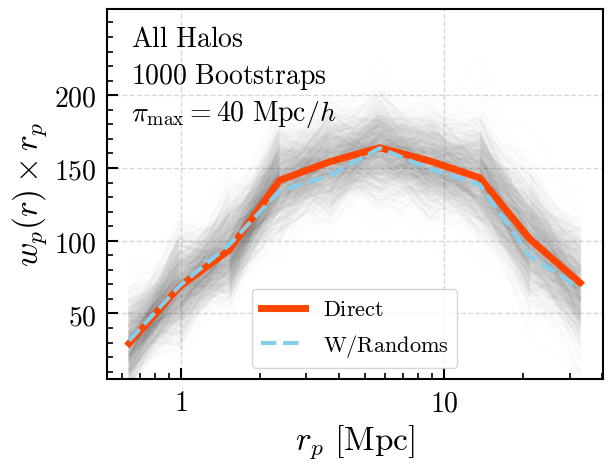

In [31]:

for wp_boot in wp_counts_resampled:
    plt.plot(r_avg, wp_boot['wp'] * r_avg, alpha=0.01, color='gray')
plt.plot(r_avg, wp_counts['wp'] * r_avg, linewidth=5, color='orangered', label=r"$\rm Direct$")
plt.plot(r_avg, wp_with_rand * r_avg, linestyle='--', linewidth=3, color='skyblue', label=r"$\rm W/Randoms$")

plt.xscale('log')
plt.legend(fontsize=16)
plt.xlabel(r"$r_{p}$ $[{\rm Mpc}]$", fontsize=24)
plt.ylabel(r"$w_p(r) \times r_p$", fontsize=24)

plt.ylim(5, 259)
plt.text(0.05, 0.90, r"$\rm All\ Halos$", transform=plt.gca().transAxes, fontsize=20)
plt.text(0.05, 0.80, r"$1000\ \rm Bootstraps$", transform=plt.gca().transAxes, fontsize=20)
plt.text(0.05, 0.70, r"$\pi_{\rm max} = 40\ {\rm Mpc}/h$", transform=plt.gca().transAxes, fontsize=20)

# change the y-axis tick label to latex font
plt.xticks([1, 10], [r"$1$", r"$10$"], fontsize=20)
plt.yticks([50, 100, 150, 200], [r"$50$", r"$100$", r"$150$", r"$200$"], fontsize=20)

plt.show()

# Concentration Split

In [17]:
from sklearn.linear_model import LinearRegression

In [89]:
mask1 = (tng_data['c_200c'] < 15)
ydata = tng_data[mask1]['c_200c']
xdata = np.log10(tng_data[mask1]['mass_halo'])

model = LinearRegression().fit(xdata.reshape(-1, 1), ydata)
meta_data = ydata - model.coef_[0] * xdata

mask_up = (meta_data > np.percentile(meta_data, 70))
mask_down = (meta_data < np.percentile(meta_data, 30))

tng_hc200 = tng_data[mask1][mask_up] #high concentration sample
tng_lc200 = tng_data[mask1][mask_down] #low concentration sample

tng_hc200 = tng_hc200[np.log10(tng_hc200['mass_halo']) > 13.2]
tng_lc200 = tng_lc200[np.log10(tng_lc200['mass_halo']) > 13.2]

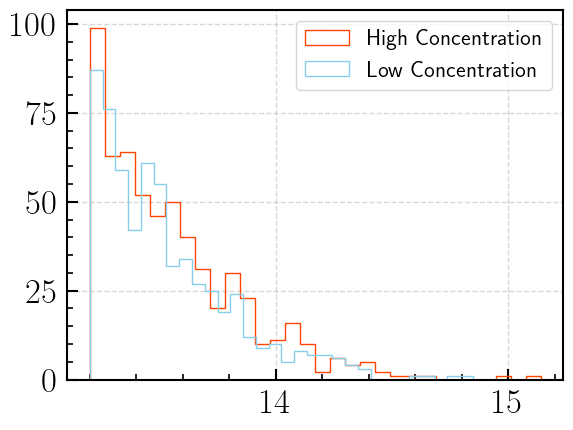

In [90]:
_ = plt.hist(np.log10(tng_hc200['mass_halo']), bins=30, histtype='step', color='orangered', label='High Concentration')
_ = plt.hist(np.log10(tng_lc200['mass_halo']), bins=30, histtype='step', color='skyblue', label='Low Concentration')
plt.legend(fontsize=16)

In [95]:
rmin = 1.0
rmax = 40
nbins = 3 
rbins = np.logspace(np.log10(rmin), np.log10(rmax), nbins + 1)
r_avg = 0.5 * (rbins[1:] + rbins[:-1])

pimax = 40.0 

Xh, Yh, Zh = tng_hc200['x'], tng_hc200['y'], tng_hc200['z']
wp_h = wp(boxsize, pimax, nthreads, rbins, Xh, Yh, Zh)

wp_h_resampled = []
num_resamples = 500
num_data_points = len(Xh)
for _ in range(num_resamples):
    # Generate random indices with replacement
    indices = np.random.choice(num_data_points, size=num_data_points, replace=True)

    # Resample the data using the random indices
    wp_h_resampled.append(wp(boxsize, pimax, nthreads, rbins, Xh[indices], Yh[indices], Zh[indices]))

Xl, Yl, Zl = tng_lc200['x'], tng_lc200['y'], tng_lc200['z']
wp_l = wp(boxsize, pimax, nthreads, rbins, Xl, Yl, Zl)

wp_l_resampled = []
num_resamples = 500
num_data_points = len(Xl)
for _ in range(num_resamples):
    # Generate random indices with replacement
    indices = np.random.choice(num_data_points, size=num_data_points, replace=True)

    # Resample the data using the random indices
    wp_l_resampled.append(wp(boxsize, pimax, nthreads, rbins, Xl[indices], Yl[indices], Zl[indices]))

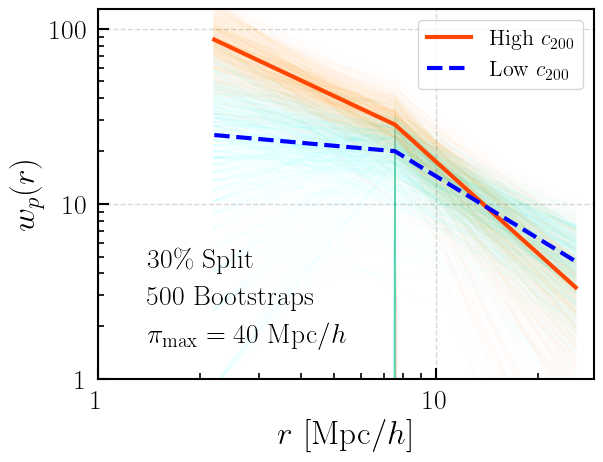

In [96]:
for wp_boot in wp_h_resampled:
    plt.loglog(r_avg, wp_boot['wp'], alpha=0.01, color='orange')

for wp_boot in wp_l_resampled:
    plt.loglog(r_avg, wp_boot['wp'], alpha=0.01, color='cyan')

plt.loglog(r_avg, wp_h['wp'], linewidth=3, color='orangered', label=r"${\rm High}\ c_{200}$")
plt.loglog(r_avg, wp_l['wp'], linestyle='--', linewidth=3, color='blue', label=r"${\rm Low}\ c_{200}$")
plt.legend(fontsize=16)
plt.xlabel(r"$r$ $[{\rm Mpc}/h]$", fontsize=24)
plt.ylabel(r"$w_p(r)$", fontsize=24)

plt.ylim(1, 129)
#plt.text(0.1, 0.30, r"$\rm All\ Halos$", transform=plt.gca().transAxes, fontsize=20)
plt.text(0.1, 0.30, r"$30\%\ \rm Split$", transform=plt.gca().transAxes, fontsize=20)
plt.text(0.1, 0.20, r"$500\ \rm Bootstraps$", transform=plt.gca().transAxes, fontsize=20)
plt.text(0.1, 0.10, r"$\pi_{\rm max} = 40\ {\rm Mpc}/h$", transform=plt.gca().transAxes, fontsize=20)

# change the y-axis tick label to latex font
plt.xticks([1, 10], [r"$1$", r"$10$"], fontsize=20)
plt.yticks([1, 10, 100], [r"$1$", r"$10$", r"$100$"], fontsize=20)


plt.show()

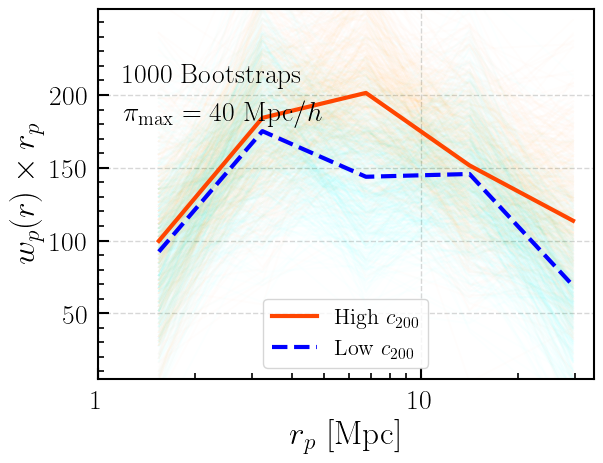

In [80]:
for wp_boot in wp_h_resampled:
    plt.plot(r_avg, wp_boot['wp'] * r_avg, alpha=0.01, color='orange')

for wp_boot in wp_l_resampled:
    plt.plot(r_avg, wp_boot['wp'] * r_avg, alpha=0.01, color='cyan')

plt.plot(r_avg, wp_h['wp'] * r_avg, linewidth=3, color='orangered', label=r"${\rm High}\ c_{200}$")
plt.plot(r_avg, wp_l['wp'] * r_avg, linestyle='--', linewidth=3, color='blue', label=r"${\rm Low}\ c_{200}$")

plt.xscale('log')
plt.legend(fontsize=16)
plt.xlabel(r"$r_{p}$ $[{\rm Mpc}]$", fontsize=24)
plt.ylabel(r"$w_p(r) \times r_p$", fontsize=24)

plt.ylim(5, 259)
#plt.text(0.05, 0.90, r"$\rm All\ Halos$", transform=plt.gca().transAxes, fontsize=20)
plt.text(0.05, 0.80, r"$1000\ \rm Bootstraps$", transform=plt.gca().transAxes, fontsize=20)
plt.text(0.05, 0.70, r"$\pi_{\rm max} = 40\ {\rm Mpc}/h$", transform=plt.gca().transAxes, fontsize=20)

# change the y-axis tick label to latex font
plt.xticks([1, 10], [r"$1$", r"$10$"], fontsize=20)
plt.yticks([50, 100, 150, 200], [r"$50$", r"$100$", r"$150$", r"$200$"], fontsize=20)

plt.show()

In [97]:
print(tng_data.keys())

['catgrp_id', 'mass_halo', 'x', 'y', 'z', 'aper_10_gal', 'aper_30_gal', 'aper_50_gal', 'aper_75_gal', 'aper_100_gal', 'aper_150_gal', 'c_200c', 'c_to_a_3d', 'b_to_a_3d', 'v_sigma_3d', 'acc_rate', 'r_20_gal', 'r_50_gal', 'r_80_gal', 'ellipticity', 'PA', 'richness_cut_r200_8.5', 'richness_cut_r200_8.5_Q', 'richness_cut_r800k_8.5', 'richness_cut_r800k_8.5_Q', 'richness_cut_r200_10', 'richness_cut_r200_10_Q', 'richness_cut_r800k_10', 'richness_cut_r800k_10_Q', 'satellite_mass_cut_r200_8.5', 'satellite_mass_cut_r200_8.5_Q', 'satellite_mass_cut_r800k_8.5', 'satellite_mass_cut_r800k_8.5_Q', 'satellite_mass_cut_r200_10', 'satellite_mass_cut_r200_10_Q', 'satellite_mass_cut_r800k_10', 'satellite_mass_cut_r800k_10_Q', 'richness_cut_r200_8.5_xy_1', 'richness_cut_r200_8.5_xy_1_Q', 'richness_cut_r200_8.5_xy_3', 'richness_cut_r200_8.5_xy_3_Q', 'richness_cut_r200_8.5_xy_5', 'richness_cut_r200_8.5_xy_5_Q', 'richness_cut_r200_8.5_xy_10', 'richness_cut_r200_8.5_xy_10_Q', 'richness_cut_r200_8.5_xy_20', 'r

231 217


/var/folders/jh/02q43k0x5tggt_fghykc1pbw0000gn/T/ipykernel_88199/2990146081.py:2: RuntimeWarning: divide by zero encountered in log10
  loglam_r200 = np.log10(tng_data["richness_cut_r200_8.5_xy_40"])


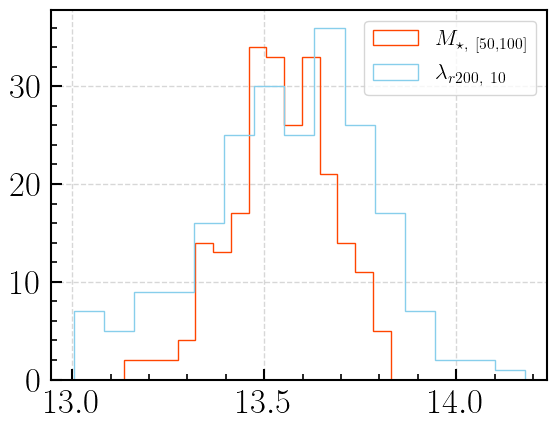

In [161]:
logm50_100 = np.log10(tng_data['aper_150_gal'] - tng_data['aper_50_gal'])
loglam_r200 = np.log10(tng_data["richness_cut_r200_8.5_xy_40"])

tng_mout = tng_data[(logm50_100 >= 10.82) & (loglam_r200 <= 1.5)]
tng_rich = tng_data[(logm50_100 <= 10.82) & (loglam_r200 >= 1.5)]

print(len(tng_mout), len(tng_rich))

_ = plt.hist(np.log10(tng_mout['mass_halo']), bins=15, histtype='step', color='orangered', label=r'$M_{\star,\ [50,100]}$')
_ = plt.hist(np.log10(tng_rich['mass_halo']), bins=15, histtype='step', color='skyblue', label=r'$\lambda_{r200,\ 10}$')
plt.legend(fontsize=16)


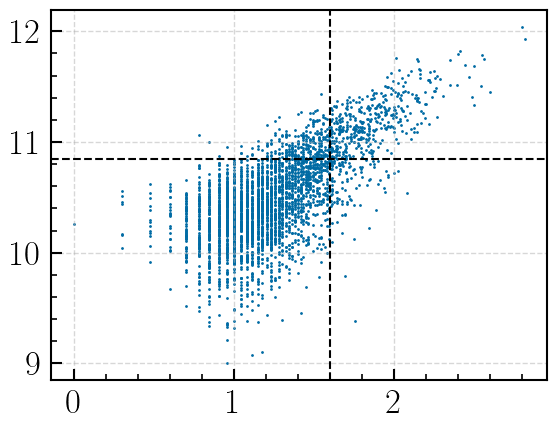

In [151]:
plt.scatter(loglam_r200, logm50_100, s=1)
plt.axhline(10.85, color='k', linestyle='--')
plt.axvline(1.6, color='k', linestyle='--')

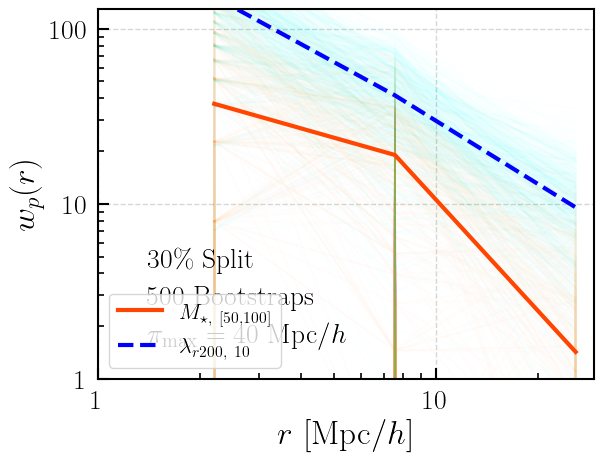

In [158]:
rmin = 1.0
rmax = 40
nbins = 3 
rbins = np.logspace(np.log10(rmin), np.log10(rmax), nbins + 1)
r_avg = 0.5 * (rbins[1:] + rbins[:-1])

pimax = 40.0 

Xh, Yh, Zh = tng_mout['x'], tng_mout['y'], tng_mout['z']
wp_m = wp(boxsize, pimax, nthreads, rbins, Xh, Yh, Zh)

wp_m_resampled = []
num_resamples = 500
num_data_points = len(Xh)
for _ in range(num_resamples):
    # Generate random indices with replacement
    indices = np.random.choice(num_data_points, size=num_data_points, replace=True)

    # Resample the data using the random indices
    wp_m_resampled.append(wp(boxsize, pimax, nthreads, rbins, Xh[indices], Yh[indices], Zh[indices]))

Xl, Yl, Zl = tng_rich['x'], tng_rich['y'], tng_rich['z']
wp_r = wp(boxsize, pimax, nthreads, rbins, Xl, Yl, Zl)

wp_r_resampled = []
num_resamples = 500
num_data_points = len(Xl)
for _ in range(num_resamples):
    # Generate random indices with replacement
    indices = np.random.choice(num_data_points, size=num_data_points, replace=True)

    # Resample the data using the random indices
    wp_r_resampled.append(wp(boxsize, pimax, nthreads, rbins, Xl[indices], Yl[indices], Zl[indices]))

for wp_boot in wp_m_resampled:
    plt.loglog(r_avg, wp_boot['wp'], alpha=0.01, color='orange')

for wp_boot in wp_r_resampled:
    plt.loglog(r_avg, wp_boot['wp'], alpha=0.01, color='cyan')

plt.loglog(r_avg, wp_m['wp'], linewidth=3, color='orangered', label=r'$M_{\star,\ [50,100]}$')
plt.loglog(r_avg, wp_r['wp'], linestyle='--', linewidth=3, color='blue', label=r'$\lambda_{r200,\ 10}$')
plt.legend(fontsize=16)
plt.xlabel(r"$r$ $[{\rm Mpc}/h]$", fontsize=24)
plt.ylabel(r"$w_p(r)$", fontsize=24)

plt.ylim(1, 129)
#plt.text(0.1, 0.30, r"$\rm All\ Halos$", transform=plt.gca().transAxes, fontsize=20)
plt.text(0.1, 0.30, r"$30\%\ \rm Split$", transform=plt.gca().transAxes, fontsize=20)
plt.text(0.1, 0.20, r"$500\ \rm Bootstraps$", transform=plt.gca().transAxes, fontsize=20)
plt.text(0.1, 0.10, r"$\pi_{\rm max} = 40\ {\rm Mpc}/h$", transform=plt.gca().transAxes, fontsize=20)

# change the y-axis tick label to latex font
plt.xticks([1, 10], [r"$1$", r"$10$"], fontsize=20)
plt.yticks([1, 10, 100], [r"$1$", r"$10$", r"$100$"], fontsize=20)


plt.show()